<a href="https://colab.research.google.com/github/mohit-ranjan18/gen-ai/blob/agent-experiments/langraph-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!echo "# gen-ai" >> README.md
!git init
!git config --global user.email "mohit.ranjan18@gmail.com"
!git config --global user.name "mohit-ranjan18"
!git add README.md
!git commit -m "first commit"
!git branch -M master
# !git remote add origin https://github.com/mohit-ranjan18/gen-ai.git
# !git push -u origin main

Reinitialized existing Git repository in /content/.git/
[master b3cdb72] first commit
 1 file changed, 1 insertion(+)


In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
import getpass
import os

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [4]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.2 MB/s eta 0:00:00


In [5]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [6]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content='Je adore le programmation.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 55, 'total_tokens': 62, 'completion_time': 0.017004686, 'prompt_time': 0.002837082, 'queue_time': 0.199866535, 'total_time': 0.019841768}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--897b3496-9ea9-48d4-954e-6e7fa5f2fb01-0', usage_metadata={'input_tokens': 55, 'output_tokens': 7, 'total_tokens': 62})

In [7]:
print(ai_msg.content)

Je adore le programmation.


In [8]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [9]:
graph_builder.add_edge(START, "chatbot")

In [10]:
graph = graph_builder.compile()

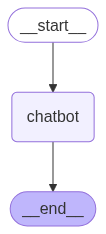

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [12]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: Tell me something about trump and modi relation and how it impacts world
Assistant: The relationship between Donald Trump, the 45th President of the United States, and Narendra Modi, the Prime Minister of India, has been significant and has had various implications for the world.

**Early Relations (2014-2016)**

Narendra Modi, who became the Prime Minister of India in 2014, was initially seen with skepticism by the Obama administration due to concerns over his handling of the 2002 Gujarat riots. However, Donald Trump, who was a businessman at that time, had expressed admiration for Modi's economic policies and had even tweeted about his potential as a leader.

**Trump's Presidency (2017-2021)**

When Trump became the President of the United States in 2017, he quickly established a rapport with Modi. The two leaders shared a strong commitment to economic nationalism, and Trump saw Modi as a kindred spirit in his efforts to promote American business interests in India.

**Key Deve